# Các nội dung chính
1. Mục tiêu:
*   Nắm được các bước cơ bản trong khâu tiền xử lí dữ liệu.


2. Dữ liệu: 
* Dữ liệu bất động sản - *Bengaluru_House_Data*
> Gồm các trường dữ liệu: location, size, total_sqft, price, ...


> Link Kaggle: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data




3. Yêu cầu:
* Sử dụng các công cụ (Pandas, Seaborn, ...) để thực hiện xem xét, đánh giá đặc điểm của dữ liệu, từ đó đưa ra phương án tiền xử lí dữ liệu (làm sạch, trích xuất thông tin ban đầu, ...)




# Nội dung thực hành

### Import Libraries

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load dataset 

1. Đọc dữ liệu bằng pandas, dạng dataframe

In [61]:
%cd /content/drive/MyDrive/Preprocessing_practice/1.Practice/Bangalore_House_Price_data
# Nếu chạy trên colab thì cũng cần trỏ tới thư mục phù hợp để lấy data
# cd DIR_PATH

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Preprocessing_practice/1.Practice/Bangalore_House_Price_data'
d:\Workspaces\FoundationModelLab\ML\Exercises\Ex2


In [62]:
path = "Bangalore_House_Price_data\Bengaluru_House_Data.csv"
df_raw = pd.read_csv(path)
df_raw.shape

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\admin\AppData\Local\Temp\ipykernel_9188\476173179.py:1: SyntaxWarning: invalid escape sequence '\B'
  path = "Bangalore_House_Price_data\Bengaluru_House_Data.csv"


(13320, 9)

2. Review 5 sample đầu tiên

In [63]:
df_raw.head() # return DataFrame

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


3. Review 5 sample cuối cùng

In [64]:
df_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


### Exploratory Data Analysis (EDA)

In [65]:
df = df_raw.copy() #Tạo bản sao để thực hiện EDA

1. Thông tin cơ bản về dữ liệu, tên trường, số giá trị non-null của từng trường, kiểu dữ liệu của từng trường

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


2. Thống kê 1 số thuộc tính cơ bản của dữ liệu, bao gồm count, mean, std, min, max, quartile

In [67]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


3. Thống kê các giá trị duy nhất của từng trường và số lần xuất hiện của chúng

In [68]:
def value_count(df):
  for var in df.columns:
    print(df[var].value_counts())
    print("--------------------------------")

value_count(df)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
--------------------------------
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
--------------------------------
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
-----------

4. Xem xét tương quan về giá trị của các cặp trường số

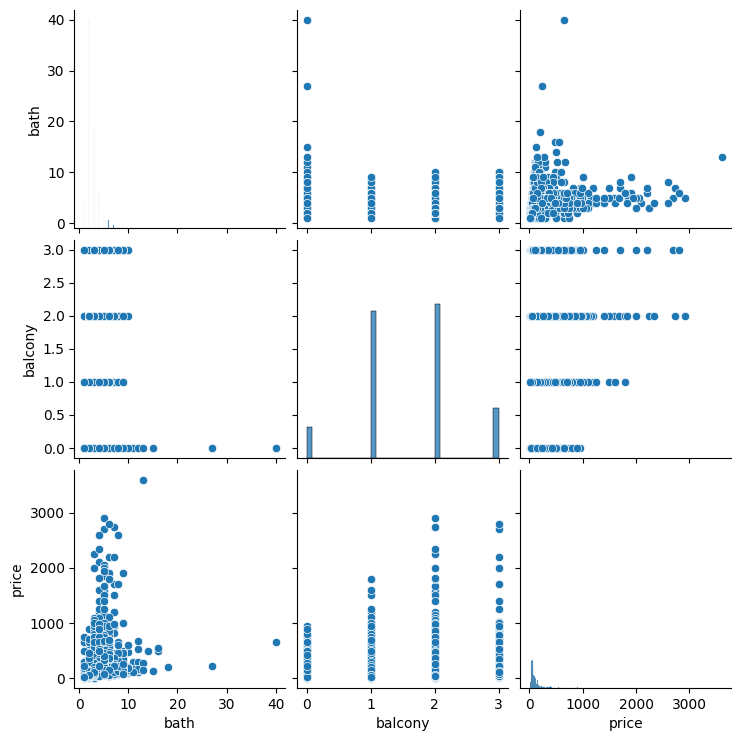

In [69]:
sns.pairplot(df)

<Axes: >

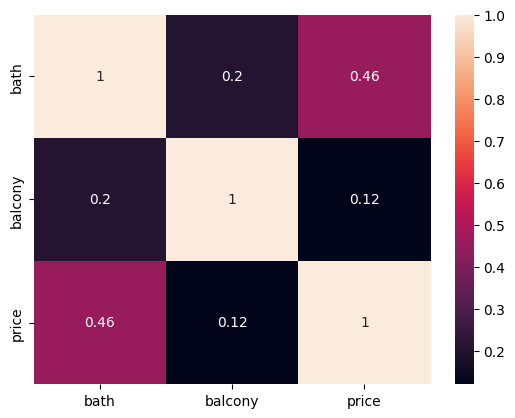

In [70]:
num_vars = ["bath", "balcony", "price"]
sns.heatmap(df[num_vars].corr(),cmap= None, annot=True)

### Prepare Data for Machine Learning Model

#### Data cleaning

1. Thống kê số lượng và tỉ lệ giá trị null của từng thuộc tính

In [71]:
df.isnull().sum() #So luong gia tri null cua tung thuoc tinh

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [72]:
df.isnull().mean() # Tỷ lệ giá trị null của từng thuộc tính

area_type       0.000000
availability    0.000000
location        0.000075
size            0.001201
society         0.413063
total_sqft      0.000000
bath            0.005480
balcony         0.045721
price           0.000000
dtype: float64

2. Loại đi trường society vì tỉ lệ null cao (41%)

In [73]:
df_not_society = df.drop(["society"], axis = 1)
df_not_society

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


3. Thay thế giá trị null trong trường balcony bằng giá trị trung bình của các giá trị not null

In [74]:
df_not_society['balcony'] = df_not_society['balcony'].fillna(df_not_society['balcony'].mean())
df_not_society.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

4. Xóa đi các điểm dữ liệu (hàng) có giá trị nan (không có giá trị)

In [75]:
df3 = df_not_society.dropna()
df3.shape

(13246, 8)

In [76]:
df3.isnull().sum() #Thống kê lại xem đã xử lí hết các dữ liệu null hay chưa?

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

#### Feature Engineering

In [77]:
#Cho phép in ra toàn bộ các giá trị output có thể của câu lệnh
pd.set_option("display.max_columns", None) 
pd.reset_option("display.max_rows", None) #Data is large

1. Converting 'total_sqft' cat feature in numeric

In [78]:
df3['total_sqft'].value_counts()

total_sqft
1200    843
1100    221
1500    204
2400    195
600     180
       ... 
5985      1
3580      1
2461      1
1437      1
4689      1
Name: count, Length: 2067, dtype: int64

2. Chuyển trường total_sqft thành kiểu float

In [79]:
total_sqft_float = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_float.append(float(str_val))
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_float.append((float(temp[0])+float(temp[-1]))/2) 
    except:
      total_sqft_float.append(np.nan)

In [80]:
df4 = df3.reset_index(drop=True)
df4

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00
...,...,...,...,...,...,...,...,...
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.00
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00


3. Thêm trường total_sqft kiểu float

In [81]:
total_sqft_float_df = pd.DataFrame(total_sqft_float, columns= ['total_sqft_float'])
df5 = pd.concat([df4, total_sqft_float_df], axis = 1)
df5

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00,1200.0
...,...,...,...,...,...,...,...,...,...
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.00,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00,4689.0


6. Thông tin về số điểm dữ liệu null của từng trường

In [82]:
df5.isnull().sum()

area_type            0
availability         0
location             0
size                 0
total_sqft           0
bath                 0
balcony              0
price                0
total_sqft_float    46
dtype: int64

7. Bỏ đi các điểm dữ liệu (hàng) có giá trị null

In [83]:
df6 = df5.dropna()
df6.shape

(13200, 9)

8. Xem lại thông tin của dataframe 

In [84]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13200 non-null  object 
 1   availability      13200 non-null  object 
 2   location          13200 non-null  object 
 3   size              13200 non-null  object 
 4   total_sqft        13200 non-null  object 
 5   bath              13200 non-null  float64
 6   balcony           13200 non-null  float64
 7   price             13200 non-null  float64
 8   total_sqft_float  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


9. Làm việc với feature: *size*

In [85]:
# Quan sát sự phân bố giá trị của trường 'size' với value_counts
df6['size'].value_counts()

size
2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [86]:
#Chuyển thuộc tính số phòng từ dạng category về dạng numeric
size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)

In [87]:
df6

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00,1200.0
...,...,...,...,...,...,...,...,...,...
13241,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00,3453.0
13242,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.00,3600.0
13243,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00,1141.0
13244,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00,4689.0


In [88]:
#Đánh lại index cho các hàng theo dãy số tự nhiên liên tiếp
df6 = df6.reset_index(drop=True) 
df6

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00,1200.0
...,...,...,...,...,...,...,...,...,...
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.00,3453.0
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.00,3600.0
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.00,1141.0
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.00,4689.0


In [89]:
# Thêm trường dữ liệu số phòng (bhk)
df7 = df6.join(pd.DataFrame({'bhk':size_int}))
df7.shape

(13200, 10)

In [90]:
#In ra kết quả thực hiện các thao tác kể trên?
df7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


10. Finding Outlier and Removing
* Dựa trên biểu đồ boxplot vừa thực hiện ở trên/ hoặc công cụ khác để phát hiện và loại bỏ các điểm ngoại lai:

<Axes: xlabel='total_sqft_float'>

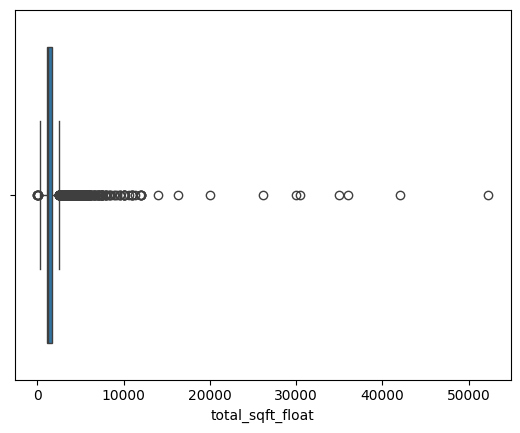

In [91]:
# Xem xét trường diện tích:
sns.boxplot(x = df7['total_sqft_float'])

In [92]:
# Chọn ngưỡng diện tích là 350 để xem xét
df7[df7['total_sqft_float']/df7['bhk'] < 350]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.0,1020.0,6
26,Super built-up Area,Ready To Move,Electronic City,2 BHK,660,1.0,1.000000,23.1,660.0,2
29,Super built-up Area,Ready To Move,Electronic City,3 BHK,1025,2.0,1.000000,47.0,1025.0,3
45,Plot Area,Ready To Move,HSR Layout,8 Bedroom,600,9.0,1.584376,200.0,600.0,8
57,Plot Area,Ready To Move,Murugeshpalya,6 Bedroom,1407,4.0,1.000000,150.0,1407.0,6
...,...,...,...,...,...,...,...,...,...,...
13161,Plot Area,Ready To Move,Margondanahalli,5 Bedroom,1375,5.0,1.000000,125.0,1375.0,5
13180,Plot Area,Ready To Move,Hosakerehalli,5 Bedroom,1500,6.0,2.000000,145.0,1500.0,5
13183,Plot Area,Ready To Move,Vidyaranyapura,5 Bedroom,774,5.0,3.000000,70.0,774.0,5
13186,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,1200,5.0,1.584376,325.0,1200.0,4


In [93]:
# Loại bỏ đi các điểm dữ liệu có diện tích phòng trung bình < 350
df8 = df7[~(df7['total_sqft_float']/df7['bhk'] < 350)]
df8.shape

(12106, 10)

In [94]:
# Tạo thêm trường dữ liệu price_per_sqft (giá/ diện tích feet vuông)
df8['price_per_sqft'] = df8['price'] / df8['total_sqft_float']  
df8.head()

C:\Users\admin\AppData\Local\Temp\ipykernel_9188\2056189343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft'] = df8['price'] / df8['total_sqft_float']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,0.036998
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,0.046154
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,0.043056
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,0.062459
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,0.042500


In [95]:
df8.price_per_sqft.describe()

count    12106.000000
mean         0.061845
std          0.040200
min          0.002678
25%          0.042000
50%          0.052611
75%          0.068000
max          1.764706
Name: price_per_sqft, dtype: float64

# Bài tập bổ sung (homework)

> Phần bài tập này là các câu hỏi  mở rộng, làm tiếp theo bài toán ở trên. Học viên cần viết mã để thực hiện các yêu cầu dưới đây:

Bài tập 0: Sử dụng sns.boxplot() để quan sát đặc điểm phân bố dữ liệu của các trường số, mỗi trường này có outlier ko?

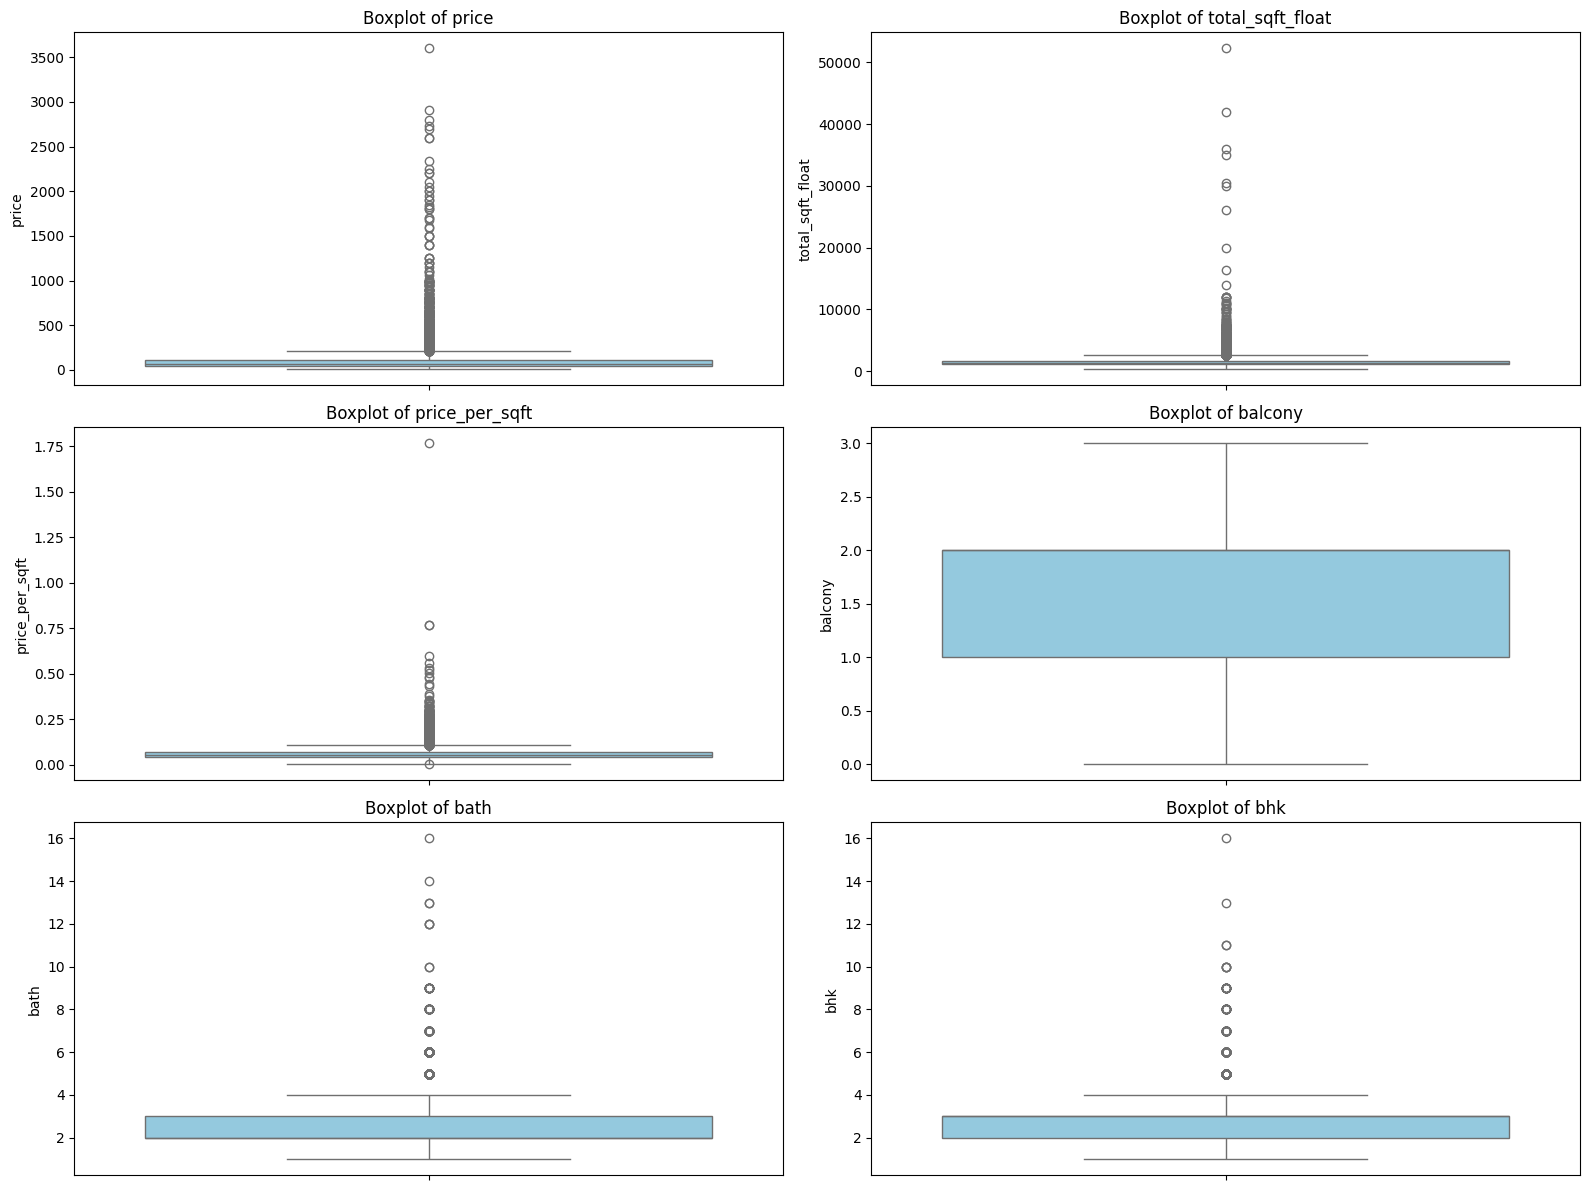

In [96]:
# Sử dụng boxplot để quan sát phân bố của dữ liệu và phát hiện ngoại lai của từng trường dữ liệu trong vars
# Gợi ý: sns.boxplot(data_field)

vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(16,12))
#Code ở đây
for i, col in enumerate(vars, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots
    sns.boxplot(data=df8, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()  # prevent overlap between plots

plt.show()

Bài tập 1: Viết hàm bỏ đi các điểm dữ liệu có price per sqft dựa trên mean, std của các ngôi nhà dựa trên từng vị trí

> Gợi ý: Xét trên từng vị trí (location), ngôi nhà thỏa mãn phải có $price\_per\_sqft \in [mean - std, mean + std]$

In [97]:
df8["price_per_sqft"].describe()

count    12106.000000
mean         0.061845
std          0.040200
min          0.002678
25%          0.042000
50%          0.052611
75%          0.068000
max          1.764706
Name: price_per_sqft, dtype: float64

In [98]:
def remove_pps_outliers(df, column):
  #Code ở đây
  new_df = pd.DataFrame()
  for key, subdf in df.groupby("location"):
    e = subdf[column].mean()
    std = subdf[column].std()
    upper = e + std
    lower = e - std
    satisfied_df = subdf[(subdf[column] <= upper) & (subdf[column] >= lower)]
    new_df = pd.concat([new_df, satisfied_df], ignore_index=True)
  return new_df
#--------
df9 = remove_pps_outliers(df8, "price_per_sqft")
df9.shape

(9239, 11)

Bài tập 2: Loại bỏ outlier xét theo trường bkh (số phòng)

Xét theo từng khu vực địa lí và theo từng loại nhà với số lượng phòng khác nhau, có một số ngôi nhà có giá không hợp lí (outliers), hãy tìm cách loại bỏ các outlier này. Cần ghi rõ quy tắc ghi nhận outlier

In [99]:
def remove_bhk_outliers(df):
  # Code ở đây
  exclude_indices = np.array([])
  for key, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')

df10 = remove_bhk_outliers(df9)
df10.shape

(7544, 11)

Bài tập 3: Loại bỏ outlier khi xét trường 'bathroom'

In [100]:
df10.bath.unique() #Có thể quan sát thấý một số căn nhà có số phòng tắm quá lớn (VD: 12!!!)

array([ 2.,  3.,  1.,  5.,  4.,  8.,  9.,  6.,  7., 16., 12.])

In [101]:
df10[df10.bath > df10.bhk+2]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
1939,Built-up Area,Ready To Move,Chikkabanavar,4 Bedroom,2460,7.0,2.000000,80.0,2460.0,4,0.032520
6063,Built-up Area,Ready To Move,Nagasandra,4 Bedroom,7000,8.0,1.584376,450.0,7000.0,4,0.064286
7373,Super built-up Area,Ready To Move,Sathya Sai Layout,6 BHK,11338,9.0,1.000000,1000.0,11338.0,6,0.088199
7877,Super built-up Area,Ready To Move,Thanisandra,3 BHK,1806,6.0,2.000000,116.0,1806.0,3,0.064230


In [102]:
#Code ở đây, sao cho: df10[df10.bath < df10.bhk+2]
df11 = df10[df10.bath < df10.bhk+2]
df11.shape

(7463, 11)

In [103]:
df11.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,2 BHK,1100,2.0,1.0,70.0,1100.0,2,0.063636
1,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1672,3.0,2.0,150.0,1672.0,3,0.089713
2,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,3.0,149.0,1750.0,3,0.085143
3,Super built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.0,2.0,150.0,1750.0,3,0.085714
5,Super built-up Area,Ready To Move,Devarachikkanahalli,2 BHK,1250,2.0,2.0,40.0,1250.0,2,0.032000


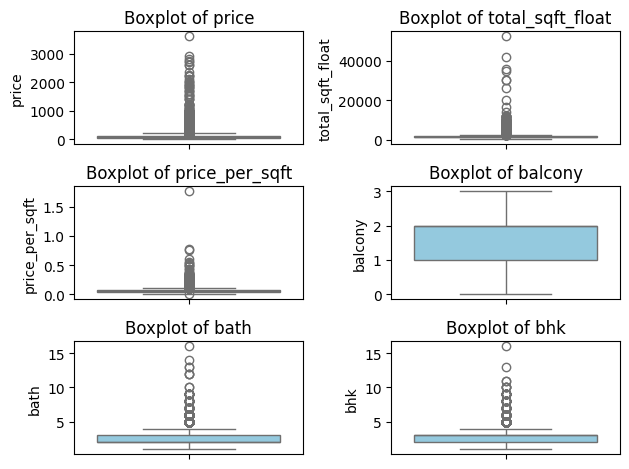

In [104]:
# Quan sát lại kết quả sau khi xử lí với boxplot
for i, col in enumerate(vars, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns of subplots
    sns.boxplot(data=df8, y=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()  # prevent overlap between plots

plt.show()
# (Dùng lại hàm đã code bên trên)

Bài tập 4: Xem xét bỏ đi các trường không cần thiết

Gợi ý: bỏ đi ['area_type', 'availability',"location","size","total_sqft"]

In [105]:
df12 = df11.drop(['area_type', 'availability',"location","size","total_sqft"], axis = 1)#Code ở đây 
df12.head()

,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,2.0,1.0,70.0,1100.0,2,0.063636
1,3.0,2.0,150.0,1672.0,3,0.089713
2,3.0,3.0,149.0,1750.0,3,0.085143
3,3.0,2.0,150.0,1750.0,3,0.085714
5,2.0,2.0,40.0,1250.0,2,0.032000


In [106]:
#Lưu kết quả xử lí cuối cùng:

df12.to_csv("clean_data.csv", index=False)

Bài tập 5*: Viết hàm trực quan hóa thể hiện mối tương quan giữa tổng diện tích (total_sqft) và giá nhà (price) theo từng vị trí địa lí (location) (tùy chọn minh họa theo 2 vị trí nào đó), của những căn nhà có 2 hoặc 3 phòng. Và cần phân biệt rõ điểm dữ liệu nào tương ứng với nhà có 2 phòng, điểm nào tương ứng với nhà có 3 phòng?

Gợi ý: Kết quả tương tự như hình dưới/ hoặc biểu đồ khác có ý nghĩa tương đương

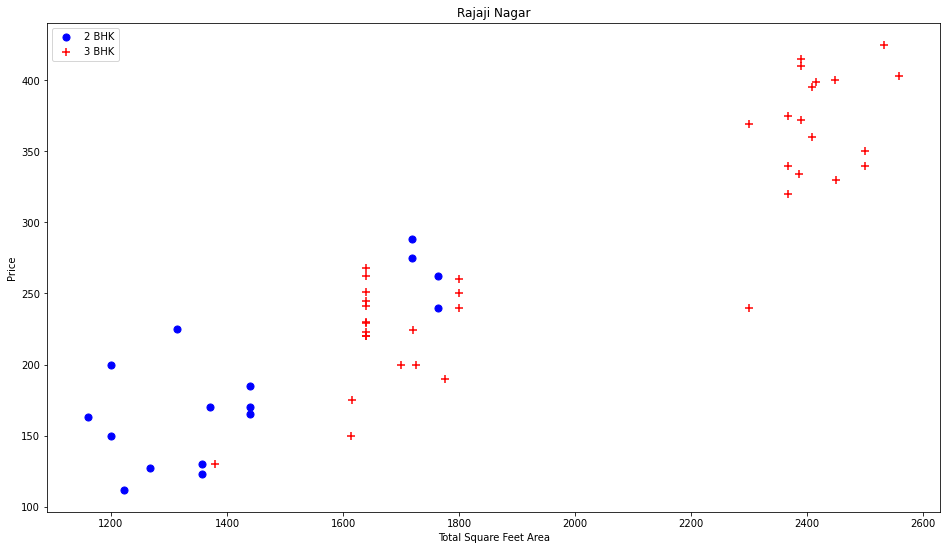

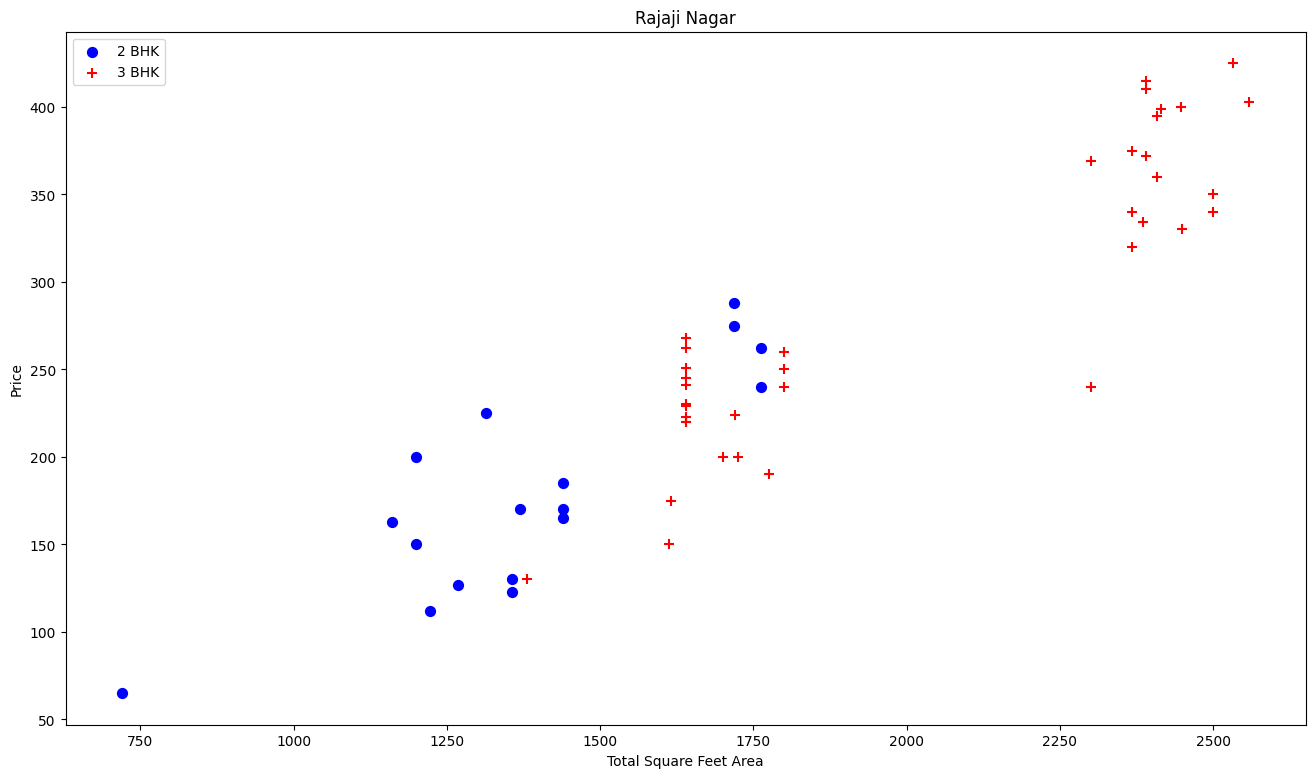

In [107]:
#Gợi ý: Sử dụng plt.scatter() .... hoạc câu lệnh khác tương đương. Làm với df9

def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_float, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_float, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df9, "Rajaji Nagar")

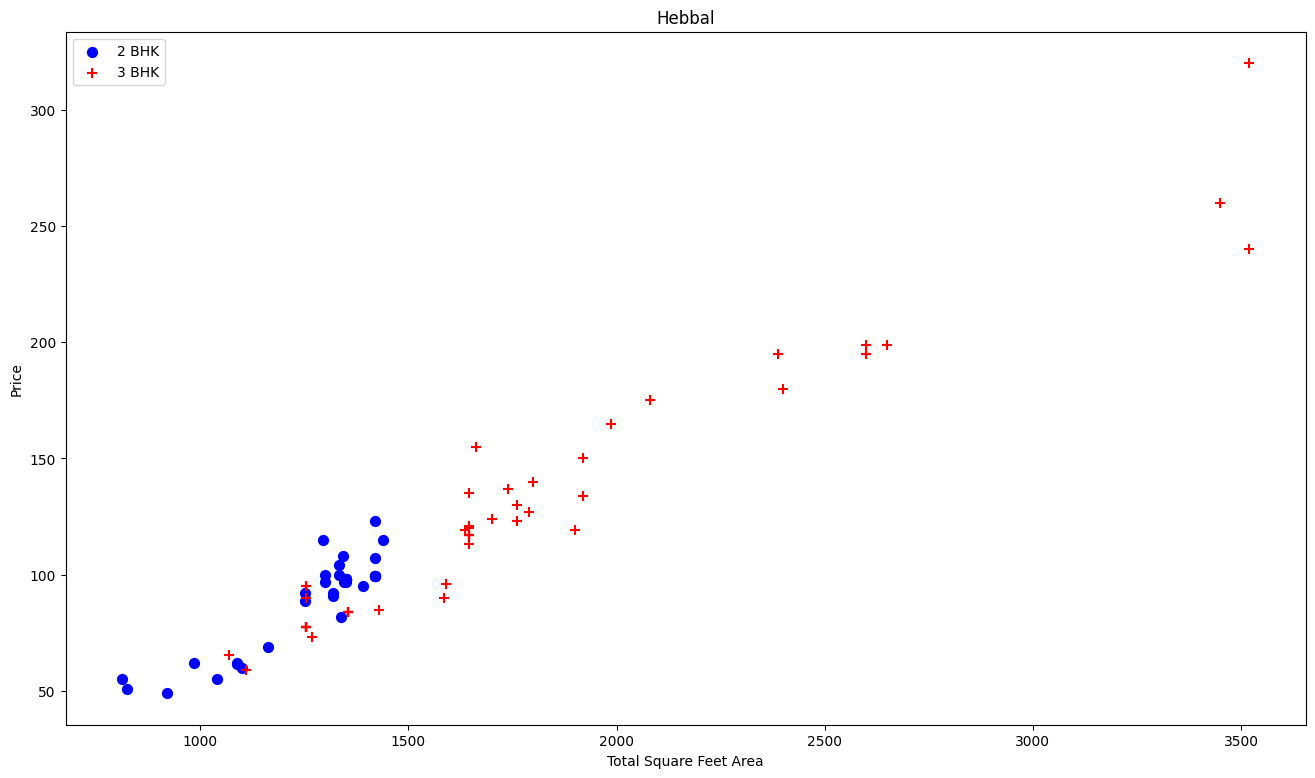

In [108]:
plot_scatter_chart(df9, "Hebbal")

Bài tập 6*: Thực hiện các câu lệnh để trả lời các câu hỏi dưới đây:

* Thống kê giá nhà theo từng loại khu vực (area_type). Làm với df9:
* xem xét theo từng khu vực, thì giá nhà trung bình (price_per_sqft) là bao nhiêu, tương quan về giá nhà trung bình giữa các khu vực

* Gợi ý: Phần này có thể đưa ra kết quả dạng bảng hoặc biểu đồ (cột, histogram, ...). 
 - Sử dụng các lệnh: df.groupby(), df.sortvalues(), ... để trích xuất giá trị
 - Sử dụng matplotlib: plt.bar(), ...


C:\Users\admin\AppData\Local\Temp\ipykernel_9188\1364471990.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(df_not_society['area_type'], rotation=60, horizontalalignment= 'right')


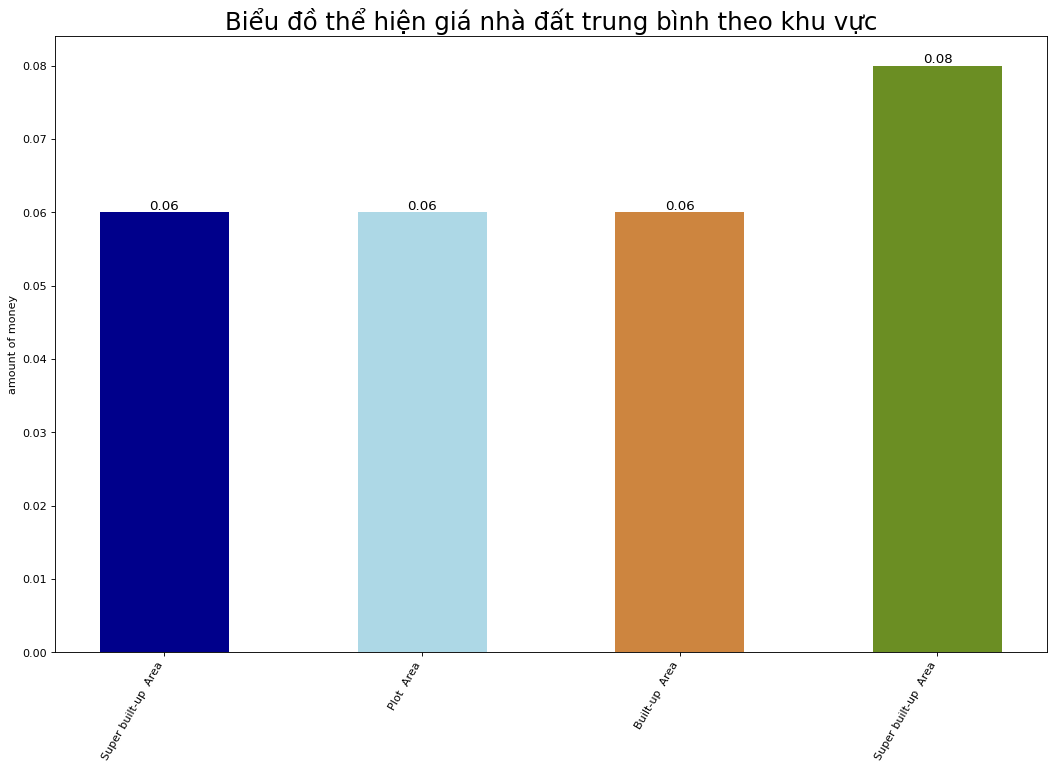

In [109]:
# Code ở đây
import random 

df91 = df9.groupby('area_type')['price_per_sqft'].mean().reset_index(name='money')
df91 = df91.sort_values(by = 'money') 

df91['money'] = df91['money'].apply(lambda x : round(x, 2))
n = df91['area_type'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())

random.seed(100) #Chọn màu ngẫu nhiên cho các cột :)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df91['area_type'], df91['money'], color=c, width=.5)
for i, val in enumerate(df91['money'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df_not_society['area_type'], rotation=60, horizontalalignment= 'right')
plt.title("Biểu đồ thể hiện giá nhà đất trung bình theo khu vực", fontsize=22)
plt.ylabel('amount of money')
plt.show()